# 2 HiSPARC-API
## Inleiding
Informatie over en van meetstations (configuraties, events, coincidenties) is op te halen via de publieke database op http://data.hisparc.nl 

Dit notebook gaat over het ophalen en verwerken van gegevens van meetstations GPS posities, hardwareserienummers, detector tijdoffsets en PMT spanning via de **HiSPARC API**.

Via de API kan door middel van een URL informatie uit de publieke database over stations worden opgevraagd:
- http://data.hisparc.nl/api/clusters/  (de clusters in het netwerk in JSON)
- http://data.hisparc.nl/api/station/22/  (informatie over station 22 in JSON)
- http://data.hisparc.nl/show/source/gps/501/  (De GPS posities van station 501, in TSV)

Bovenstaande links zijn ook te vinden als links op http://data.hisparc.nl.
Meer informatie over de HiSPARC API is te vinden via: http://docs.hisparc.nl/publicdb/api_tutorial.html

In SAPPHiRE is de informatie uit de API op twee manieren beschikbaar:
1. Direct uitlezen van API informatie via `Station()` en `Network()`
2. Analyse van groepen van stations (clusters) via `HiSPARCStation()` en `HiSPARCNetwork()`

## Uitlezen van de API via Network() en Station()

In [1]:
from sapphire import Network, Station

### Network()

Network is voor het ophalen van informatie over het netwerk via de API:

In [2]:
network = Network()
print network.station_numbers()

[2, 3, 5, 6, 7, 9, 10, 13, 21, 22, 23, 101, 102, 103, 104, 105, 201, 202, 203, 301, 303, 304, 305, 401, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 601, 1001, 1002, 1003, 1006, 1007, 1008, 1009, 1010, 1101, 1102, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2101, 2102, 2103, 2201, 3001, 3002, 3101, 3102, 3103, 3104, 3105, 3201, 3202, 3203, 3301, 3302, 3303, 3401, 3501, 3601, 3701, 4001, 4002, 4003, 4004, 7001, 7002, 7003, 7101, 7201, 7301, 7401, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8101, 8102, 8103, 8104, 8105, 8201, 8301, 8302, 8303, 13001, 13002, 13003, 13004, 13005, 13006, 13007, 13008, 13101, 13102, 13103, 13104, 13201, 13301, 13401, 13501, 14001, 14002, 14003, 20001, 20002, 20003]


In [3]:
print network.clusters()

[{u'name': u'Amsterdam', u'number': 0}, {u'name': u'Utrecht', u'number': 1000}, {u'name': u'Nijmegen', u'number': 2000}, {u'name': u'Leiden', u'number': 3000}, {u'name': u'Groningen', u'number': 4000}, {u'name': u'Enschede', u'number': 7000}, {u'name': u'Eindhoven', u'number': 8000}, {u'name': u'Cambridge', u'number': 11000}, {u'name': u'Durham', u'number': 12000}, {u'name': u'Bristol', u'number': 13000}, {u'name': u'Birmingham', u'number': 14000}, {u'name': u'Aarhus', u'number': 20000}, {u'name': u'Karlsruhe', u'number': 70000}]


In [4]:
print network.station_numbers(cluster=2000)

[2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2101, 2102, 2103, 2201]


### Station()
`Station()` kan informatie over een meetstation uit de API lezen.

De informatie uit de URL http://data.hisparc.nl/api/station/22/ (informatie over meetstation 22, St. Ignatius, Adam) kunnen we ook met Station() opvragen:

In [5]:
print Station(22).info

{u'name': u'St. Ignatius Gymnasium', u'latitude': 52.3494298, u'country': u'Netherlands', u'altitude': 60.7, u'number': 22, u'longitude': 4.8738439, u'scintillators': [{u'alpha': 25.0, u'beta': 7.0, u'radius': 1.44, u'height': 0.0}, {u'alpha': 84.0, u'beta': 88.0, u'radius': 14.23, u'height': 0.0}], u'cluster': u'Amsterdam', u'subcluster': u'Amsterdam', u'active': True}


Een belangrijke eigenschap is de plaats waar een station zich bevindt. 

Deze informatie is te vinden via de API met de URL: http://data.hisparc.nl/show/source/gps/22/

Via Station():

In [6]:
print Station(22).gps_locations

[(1265290274, 52.3342237, 4.8863615, 97.09)
 (1339586873, 52.3494186, 4.8738435, 61.28)
 (1339680234, 52.3494234, 4.873842, 61.46)
 (1371715473, 52.3494098, 4.8738262, 60.94)
 (1383730933, 52.3494298, 4.8738439, 60.7)]


Dit zijn *alle* GPS posities van meetstation 22.

We zien hier een array met daarin een aantal lijsten. Het eerste item op iedere regel legt vast vanaf welke moment, een GPS-tijdstempel, een station volgens de HiSPARC database op een plaats stond. Na dit GPS-tijdstempel zijn achtereenvolgens de lengte, breedte en hoogte van het station volgens GPS-84 gegeven. ([https://nl.wikipedia.org/wiki/WGS_84](https://nl.wikipedia.org/wiki/WGS_84))

We kunnen ook de *huidige* locatie ophalen:

In [7]:
from sapphire.transformations.clock import datetime_to_gps
from datetime import datetime

ts = datetime_to_gps(datetime.now())
print "timestamp: ", ts
print "GPS: ", Station(22).gps_location(ts)

timestamp:  1463416602
GPS:  {'latitude': 52.349429800000003, 'altitude': 60.700000000000003, 'longitude': 4.8738438999999998}


# Opgave 
Bepaal de GPS coordinaten van station 22 op 5 December 2012:

In [8]:
ts = datetime_to_gps(datetime(2012, 12, 5))
print "timestamp: ", ts
print "GPS: ", Station(22).gps_location(ts)

timestamp:  1354665600
GPS:  {'latitude': 52.349423399999999, 'altitude': 61.460000000000001, 'longitude': 4.8738419999999998}


## Clusters via HiSPARCStations() en HiSPARCNetwork()

### HiSPARCStations()
Met behulp van HiSPARCStations() kunnen we een cluster van een aantal meetstations aanmaken. HiSPARCNetwork() maakt een cluster van alle meetstations in het netwerk.

In [9]:
from sapphire import HiSPARCStations, HiSPARCNetwork

We maken een cluster van vier meetstations:

In [10]:
stations = [301, 303, 304, 305]
cluster = HiSPARCStations(stations)

/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/clusters.py:813: UserWarning: Could not get detector layout for stations [301, 303, 304, 305], defaults will be used!
  'defaults will be used!' % str(missing_detectors))


Van het cluster kunnen we posities van meetstations, detectoren, maar ook onderlinge afstanden e.d. eenvoudig bepalen.

In [11]:
for station in cluster.stations:
    print station.number, station.get_lla_coordinates()

301 (52.5518567, 4.6870106, 60.04000000003725)
303 (52.494334, 4.6613204, 56.46999999880791)
304 (52.54162169999999, 4.6681044, 49.28999999910593)
305 (52.5493502, 4.671813200000001, 51.70999999996275)


### set_timestamp()
Een essentiele eigenschap van een cluster is dat we een tijdstempel kunnen opgeveven. De informatie die het cluster ophaalt en berekent is geldig op het tijdstip dat overeenkomt met het tijdstempel.

In het geval van een coincidentie op timestamp 1368403200 willen we weten waar de stations op dat gegeven tijdstip stonden:

In [12]:
ts = 1368403200
cluster.set_timestamp(ts)
print "LLA coordinaten op timestamp = %d\n" % ts
for station in cluster.stations:
    print station.number, station.get_lla_coordinates()

LLA coordinaten op timestamp = 1368403200

301 (52.5518809, 4.6870001, 56.72999999951571)
303 (52.494334, 4.6613204, 56.46999999880791)
304 (52.54162169999999, 4.6681044, 49.28999999910593)
305 (52.5493502, 4.671813200000001, 51.70999999996275)


# Opgave:

In Alphen a/d Rijn staat een driehoek van stations: [3301, 3302, 3303]

Maak een plot van de onderlinge ligging van de stations.

*hint:* `get_coordinates()` geeft de (x, y, z, alpha)-coordinaten van een station in een cluster zoals HiSPARCStations(). (x,y,z) zijn in meter, alpha is de orientatiehoek in graden.

/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/clusters.py:813: UserWarning: Could not get detector layout for stations [3301, 3302, 3303], defaults will be used!
  'defaults will be used!' % str(missing_detectors))


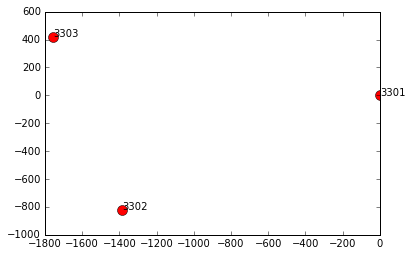

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

stations = [3301, 3302, 3303]
cluster = HiSPARCStations(stations)

for station in cluster.stations:
    x, y, z, alpha = station.get_coordinates()
    plt.plot(x, y, 'or', markersize=10)
    plt.text(x, y, station.number)

### HiSPARCNetwork()

Een cluster van het hele network kunnen we maken met HiSPARCNetwork(). Omdat daarbij informatie van *alle* stations uit het netwerk via de API worden opgehaald, is het aanmaken van HiSPARCNetwork() redelijk traag.

#### force_stale
Door gebruik te maken van de optie `force_stale=True` wordt die informatie *niet* uit de API opgehaald, maar gelezen uit SAPPHiRE. Deze informatie is mogelijk veroudert, maar wel veel sneller beschikbaar. 

De optie 'force_stale' is ook beschikbaar voor Station(), Network() en HiSPARCStations()

In [14]:
network = HiSPARCNetwork(force_stale=True)

/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/api.py:138: UserWarning: Using local data. Possibly outdated.
  warnings.warn('Using local data. Possibly outdated.')
/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/api.py:171: UserWarning: Using local data. Possibly outdated.
  warnings.warn('Using local data. Possibly outdated.')
/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/clusters.py:810: UserWarning: Could not get GPS location for stations: [1102, 13401]. Using (0, 0, 0) instead.
  'Using (0, 0, 0) instead.' % str(missing_gps))
/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/clusters.py:813: UserWarning: Could not get detector layout for stations [2, 3, 5, 7, 10, 13, 21, 22, 101, 103, 202, 203, 301, 303, 304, 305, 1001, 1002, 1003, 1006, 1007, 1008, 1010, 2001, 2002, 2003, 2004, 2005, 2008, 2010, 2101, 2102, 2103, 2201, 3001, 3002, 3101, 3102, 3103, 3104, 3105, 3202, 3203, 3301, 3302, 3303, 3401, 3501, 3601, 3701, 4001, 4002, 4003, 4004, 71

De *UserWarnings* kunnen hier genegeerd worden.

In [15]:
print "De afstand tussen 505 en 509 is %.f m" % network.calc_distance_between_stations(505, 509)

De afstand tussen 505 en 509 is 586 m


Ook voor het hele netwerk kan een timestamp worden opgegeven:

In [16]:
network.set_timestamp(datetime_to_gps(datetime(2015,3, 4)))

In combinatie met cluster aken we vaak gebruik van de functie `itertools.combinations`:

In [17]:
stations = [3, 22, 501, 509]
from itertools import combinations
for eerste, tweede in combinations(stations, 2):
    print eerste, tweede

3 22
3 501
3 509
22 501
22 509
501 509


# Opgave:

Maak een lijst van de onderlinge afstanden van meetstation in cluster Leiden, waarvoor de afstand kleiner is dan 1000 m.


In [18]:
from sapphire import Network, HiSPARCStations
stations = Network().station_numbers(cluster=2000)
cluster = HiSPARCStations(stations, force_stale=True)
for sn1, sn2 in combinations(stations, 2):
    d = cluster.calc_distance_between_stations(sn1, sn2)
    if d < 1000:
        print "De afstand tussen station %d en %d is %.f m." % (sn1, sn2, d)
    

De afstand tussen station 2001 en 2002 is 512 m.
De afstand tussen station 2001 en 2006 is 831 m.
De afstand tussen station 2101 en 2102 is 175 m.
De afstand tussen station 2101 en 2103 is 622 m.
De afstand tussen station 2102 en 2103 is 607 m.


/home/tom/miniconda2/lib/python2.7/site-packages/sapphire/clusters.py:813: UserWarning: Could not get detector layout for stations [2001, 2002, 2003, 2004, 2005, 2008, 2010, 2101, 2102, 2103, 2201], defaults will be used!
  'defaults will be used!' % str(missing_detectors))
